In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data
df = pd.read_excel('FULL_Capstone_Data.xlsx', engine='openpyxl')

# Convert categorical variable(s) to dummy variables
df = pd.get_dummies(df, drop_first=True)

# After creating dummy variables in your training data
train_columns = df.columns

# For numerical columns
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col].fillna(0, inplace=True)

# Define your features and target variable
X = df.drop('Provisional Drug Overdose Deaths', axis=1)
y = df['Provisional Drug Overdose Deaths']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Random Forest Simple Model

Mean Squared Error: 7.926188395061731


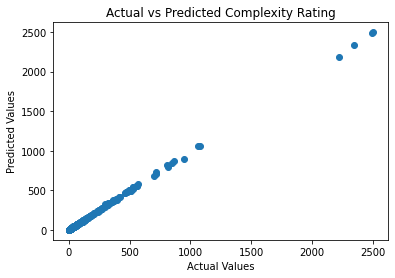

In [24]:
# Create a model
model = RandomForestRegressor(n_estimators=60, random_state=11)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Complexity Rating')
plt.show()

# Accuracy

In [25]:
# Calculate Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

# Calculate the number of predictions within ±1 of the actual values
within_range = np.abs(predictions - y_test) <= 1

# Calculate the accuracy as the proportion of predictions within the range
accuracy_within_range = np.mean(within_range)
print(f'Accuracy within ± 1: {accuracy_within_range:.2f}')

Root Mean Squared Error: 2.8153487164224846
Mean Absolute Error: 0.7386518518518522
R-squared: 0.9997669303822639
Accuracy within ± 1: 0.87


# New Data Section

### This is where we will upload new data (in May when it's released) to predict out further into the future

In [3]:
# Load new data
new_data = pd.read_excel('predictions_before.xlsx', engine='openpyxl')

# Preprocess the new data in the same way as the training data
new_data = pd.get_dummies(new_data, drop_first=True)

# For numerical columns
#new_data[col].fillna(new_data[col].mean(), inplace=True)
for col in new_data.columns:
    if new_data[col].dtype == 'float64' or new_data[col].dtype == 'int64':
        new_data[col].fillna(0, inplace=True)

# Add missing columns of zeros
missing_cols = set(train_columns) - set(new_data.columns)
for c in missing_cols:
    new_data[c] = 0

# Ensure the order of column in the test set is in the same order than in train set
new_data = new_data[train_columns]

# Separate features from target
X_new = new_data.drop('Provisional Drug Overdose Deaths', axis=1)
y_new = new_data['Provisional Drug Overdose Deaths']


# Use the model to make predictions on the new data
new_predictions = model.predict(X_new)

# If you want to see the predicted values
print(new_predictions)


C:\Users\jjman\anaconda3\envs\JoseEnv\lib\site-packages\ipykernel_launcher.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  app.launch_new_instance()


[3.8 3.8 3.8 ... 1.3 1.3 1.3]


In [5]:
# Create a DataFrame with the desired columns and predictions
output_df = pd.DataFrame({
    'ID': new_data['ID'],
    'Provisional Drug Overdose Deaths': new_predictions
})

# Write the DataFrame to an Excel file
output_df.to_excel('Predictions_After.xlsx', index=False)